<a href="https://colab.research.google.com/github/ReynaraEzra/Data-Science-Trainee/blob/main/JSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/DST/covid_19_data.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
data_jkt = data[data['Country/Region']=='Indonesia']
data_jkt

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3114,3115,03/02/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3258,3259,03/03/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3421,3422,03/04/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3590,3591,03/05/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3760,3761,03/06/2020,NaN,Indonesia,2020-03-06T12:33:03,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...
302674,302675,05/25/2021,NaN,Indonesia,2021-05-26 04:20:35,1786187.0,49627.0,1642074.0
303439,303440,05/26/2021,NaN,Indonesia,2021-05-27 04:20:59,1791221.0,49771.0,1645263.0
304204,304205,05/27/2021,NaN,Indonesia,2021-05-28 04:20:36,1797499.0,49907.0,1649187.0
304969,304970,05/28/2021,NaN,Indonesia,2021-05-29 04:20:41,1803361.0,50100.0,1654557.0


In [4]:
data_jkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 3114 to 305734
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              454 non-null    int64  
 1   ObservationDate  454 non-null    object 
 2   Province/State   0 non-null      object 
 3   Country/Region   454 non-null    object 
 4   Last Update      454 non-null    object 
 5   Confirmed        454 non-null    float64
 6   Deaths           454 non-null    float64
 7   Recovered        454 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 31.9+ KB


In [5]:
data_jkt.drop(['SNo', 'Province/State', 'Last Update'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
data_jkt = data_jkt.reset_index()

In [7]:
data_jkt.drop('index', axis=1, inplace=True)

In [8]:
data_jkt

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,03/02/2020,Indonesia,2.0,0.0,0.0
1,03/03/2020,Indonesia,2.0,0.0,0.0
2,03/04/2020,Indonesia,2.0,0.0,0.0
3,03/05/2020,Indonesia,2.0,0.0,0.0
4,03/06/2020,Indonesia,4.0,0.0,0.0
...,...,...,...,...,...
449,05/25/2021,Indonesia,1786187.0,49627.0,1642074.0
450,05/26/2021,Indonesia,1791221.0,49771.0,1645263.0
451,05/27/2021,Indonesia,1797499.0,49907.0,1649187.0
452,05/28/2021,Indonesia,1803361.0,50100.0,1654557.0


In [9]:
data_jkt['Daily Confirmed'] = data_jkt['Confirmed']
data_jkt['Daily Deaths'] = data_jkt['Deaths']
data_jkt['Daily Recovered'] = data_jkt['Recovered']

In [10]:
for i in range(1,len(data_jkt)):
  data_jkt['Daily Confirmed'].loc[i] = data_jkt['Confirmed'].loc[i] - data_jkt['Confirmed'].loc[i-1]
  data_jkt['Daily Deaths'].loc[i] = data_jkt['Deaths'].loc[i] - data_jkt['Deaths'].loc[i-1]
  data_jkt['Daily Recovered'].loc[i] = data_jkt['Recovered'].loc[i] - data_jkt['Recovered'].loc[i-1]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
data_jkt

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Daily Confirmed,Daily Deaths,Daily Recovered
0,03/02/2020,Indonesia,2.0,0.0,0.0,2.0,0.0,0.0
1,03/03/2020,Indonesia,2.0,0.0,0.0,0.0,0.0,0.0
2,03/04/2020,Indonesia,2.0,0.0,0.0,0.0,0.0,0.0
3,03/05/2020,Indonesia,2.0,0.0,0.0,0.0,0.0,0.0
4,03/06/2020,Indonesia,4.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
449,05/25/2021,Indonesia,1786187.0,49627.0,1642074.0,5060.0,172.0,3795.0
450,05/26/2021,Indonesia,1791221.0,49771.0,1645263.0,5034.0,144.0,3189.0
451,05/27/2021,Indonesia,1797499.0,49907.0,1649187.0,6278.0,136.0,3924.0
452,05/28/2021,Indonesia,1803361.0,50100.0,1654557.0,5862.0,193.0,5370.0


In [12]:
data_jkt['ObservationDate'] = pd.to_datetime(data_jkt['ObservationDate'])
data_jkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  454 non-null    datetime64[ns]
 1   Country/Region   454 non-null    object        
 2   Confirmed        454 non-null    float64       
 3   Deaths           454 non-null    float64       
 4   Recovered        454 non-null    float64       
 5   Daily Confirmed  454 non-null    float64       
 6   Daily Deaths     454 non-null    float64       
 7   Daily Recovered  454 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 28.5+ KB


In [13]:
data_jkt

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Daily Confirmed,Daily Deaths,Daily Recovered
0,2020-03-02,Indonesia,2.0,0.0,0.0,2.0,0.0,0.0
1,2020-03-03,Indonesia,2.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-04,Indonesia,2.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-05,Indonesia,2.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-06,Indonesia,4.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
449,2021-05-25,Indonesia,1786187.0,49627.0,1642074.0,5060.0,172.0,3795.0
450,2021-05-26,Indonesia,1791221.0,49771.0,1645263.0,5034.0,144.0,3189.0
451,2021-05-27,Indonesia,1797499.0,49907.0,1649187.0,6278.0,136.0,3924.0
452,2021-05-28,Indonesia,1803361.0,50100.0,1654557.0,5862.0,193.0,5370.0


In [14]:
data_jkt.to_csv('Data Jakarta per 29 Mei 2021.csv')
data_jkt.to_excel('Data Jakarta per 29 Mei 2021.xlsx')

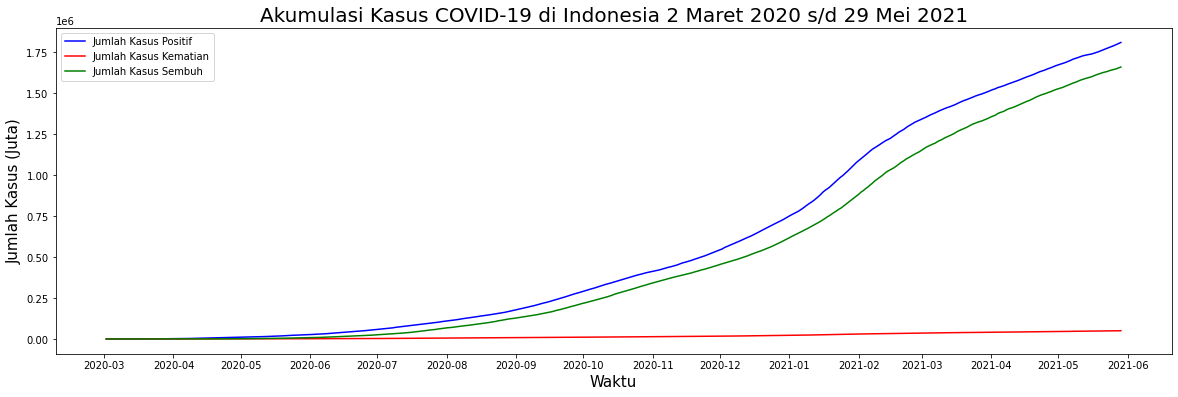

In [15]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
fig, ax = plt.subplots()
fig.set_size_inches(20, 6)

ax.plot(data_jkt['ObservationDate'], data_jkt['Confirmed'], color='blue', label='Jumlah Kasus Positif')
ax.plot(data_jkt['ObservationDate'], data_jkt['Deaths'], color='red', label='Jumlah Kasus Kematian')
ax.plot(data_jkt['ObservationDate'], data_jkt['Recovered'], color='green', label='Jumlah Kasus Sembuh')
ax.set_xlabel('Waktu', fontsize=15)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.set_ylabel('Jumlah Kasus (Juta)', fontsize=15)
ax.set_title('Akumulasi Kasus COVID-19 di Indonesia 2 Maret 2020 s/d 29 Mei 2021', fontsize=20)
ax.legend()

plt.show()

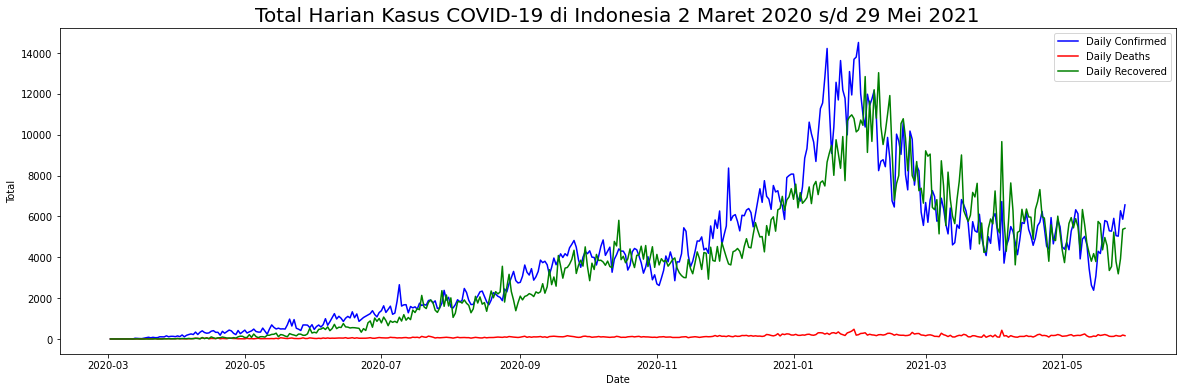

In [16]:
fig = plt.figure(figsize=(20,6))

plt.plot(data_jkt['ObservationDate'], data_jkt['Daily Confirmed'], color='blue', label='Daily Confirmed')
plt.plot(data_jkt['ObservationDate'], data_jkt['Daily Deaths'], color='red', label='Daily Deaths')
plt.plot(data_jkt['ObservationDate'], data_jkt['Daily Recovered'], color='green', label='Daily Recovered')
plt.xlabel('Date')
plt.ylabel('Total')
# plt.xticks(rotation='90')
plt.title('Total Harian Kasus COVID-19 di Indonesia 2 Maret 2020 s/d 29 Mei 2021', fontsize=20)
plt.legend()

plt.show()

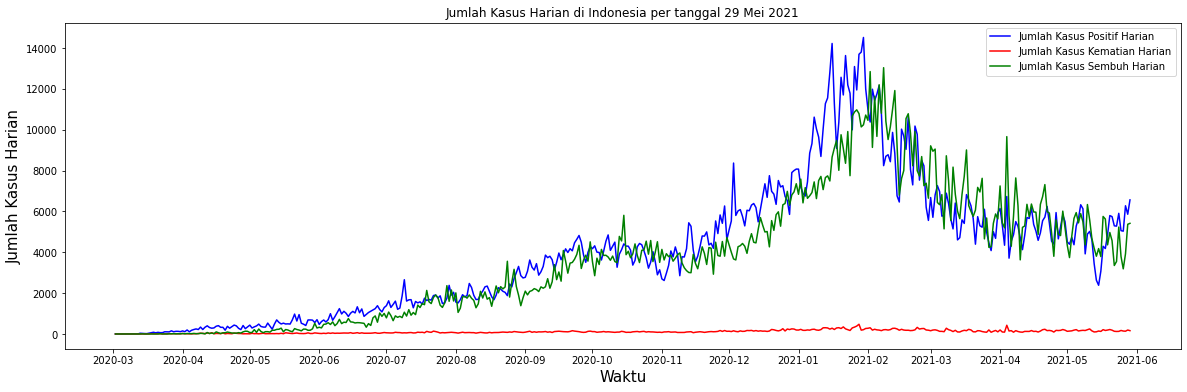

In [17]:
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)

ax.plot(data_jkt['ObservationDate'], data_jkt['Daily Confirmed'], color='blue', label='Jumlah Kasus Positif Harian')
ax.plot(data_jkt['ObservationDate'], data_jkt['Daily Deaths'], color='red', label='Jumlah Kasus Kematian Harian')
ax.plot(data_jkt['ObservationDate'], data_jkt['Daily Recovered'], color='green', label='Jumlah Kasus Sembuh Harian')
ax.set_xlabel('Waktu', fontsize=15)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.set_ylabel('Jumlah Kasus Harian', fontsize=15)
ax.set_title('Jumlah Kasus Harian di Indonesia per tanggal 29 Mei 2021')
ax.legend()

plt.show()

In [18]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [19]:
group_country = data[data['ObservationDate']=='05/29/2021'].groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [20]:
group_country = group_country.reset_index()

In [21]:
group_country

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,70111.0,2899.0,57281.0
1,Albania,132297.0,2449.0,129215.0
2,Algeria,128456.0,3460.0,89419.0
3,Andorra,13693.0,127.0,13416.0
4,Angola,34180.0,757.0,27646.0
...,...,...,...,...
190,Vietnam,6908.0,47.0,2896.0
191,West Bank and Gaza,307838.0,3492.0,300524.0
192,Yemen,6731.0,1319.0,3399.0
193,Zambia,94751.0,1276.0,91594.0


In [22]:
group_country['Death Rate'] = group_country['Deaths']/group_country['Confirmed']
group_country['Recovered Rate'] = group_country['Recovered']/group_country['Confirmed']

In [23]:
group_country

,Country/Region,Confirmed,Deaths,Recovered,Death Rate,Recovered Rate
0,Afghanistan,70111.0,2899.0,57281.0,0.041349,0.817004
1,Albania,132297.0,2449.0,129215.0,0.018511,0.976704
2,Algeria,128456.0,3460.0,89419.0,0.026935,0.696106
3,Andorra,13693.0,127.0,13416.0,0.009275,0.979771
4,Angola,34180.0,757.0,27646.0,0.022147,0.808836
...,...,...,...,...,...,...
190,Vietnam,6908.0,47.0,2896.0,0.006804,0.419224
191,West Bank and Gaza,307838.0,3492.0,300524.0,0.011344,0.976241
192,Yemen,6731.0,1319.0,3399.0,0.195959,0.504977
193,Zambia,94751.0,1276.0,91594.0,0.013467,0.966681


In [24]:
top10_country_pos = group_country.sort_values('Confirmed', ascending=False).head(10)
top10_country_pos

,Country/Region,Confirmed,Deaths,Recovered,Death Rate,Recovered Rate
182,US,33251939.0,594306.0,0.0,0.017873,0.000000
78,India,27894800.0,325972.0,25454320.0,0.011686,0.912511
23,Brazil,16471600.0,461057.0,14496224.0,0.027991,0.880074
60,France,5719877.0,109518.0,390878.0,0.019147,0.068337
180,Turkey,5235978.0,47271.0,5094279.0,0.009028,0.972937
144,Russia,4995613.0,118781.0,4616422.0,0.023777,0.924095
181,UK,4496823.0,128037.0,15481.0,0.028473,0.003443
84,Italy,4213055.0,126002.0,3845087.0,0.029908,0.912660
6,Argentina,3732263.0,77108.0,3288467.0,0.020660,0.881092
64,Germany,3684672.0,88413.0,3479700.0,0.023995,0.944372


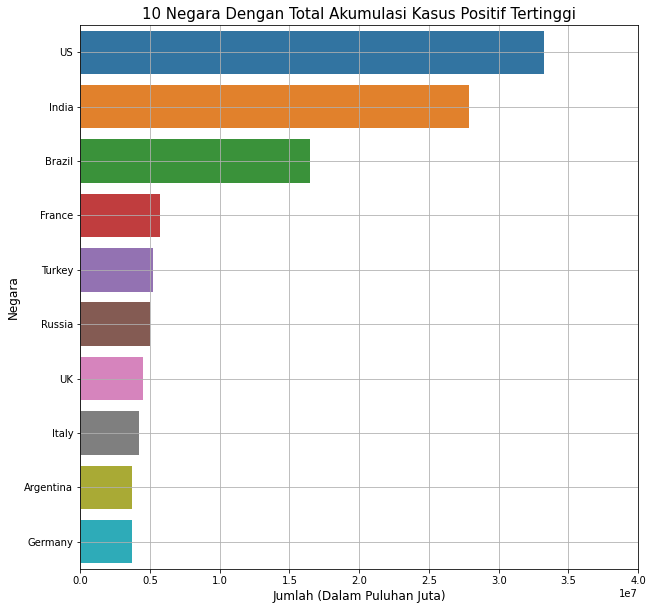

In [37]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.barplot(y = top10_country_pos['Country/Region'], x = top10_country_pos['Confirmed'])
plt.xlim([0,40000000])
plt.xlabel('Jumlah (Dalam Puluhan Juta)', fontsize=12)
plt.ylabel('Negara', fontsize=12)
plt.title('10 Negara Dengan Total Akumulasi Kasus Positif Tertinggi', fontsize=15)
plt.grid()
plt.show()

In [26]:
top10_country_death = group_country.sort_values('Deaths', ascending=False).head(10)
top10_country_death

,Country/Region,Confirmed,Deaths,Recovered,Death Rate,Recovered Rate
182,US,33251939.0,594306.0,0.0,0.017873,0.000000
23,Brazil,16471600.0,461057.0,14496224.0,0.027991,0.880074
78,India,27894800.0,325972.0,25454320.0,0.011686,0.912511
116,Mexico,2411503.0,223455.0,1924865.0,0.092662,0.798201
181,UK,4496823.0,128037.0,15481.0,0.028473,0.003443
84,Italy,4213055.0,126002.0,3845087.0,0.029908,0.912660
144,Russia,4995613.0,118781.0,4616422.0,0.023777,0.924095
60,France,5719877.0,109518.0,390878.0,0.019147,0.068337
64,Germany,3684672.0,88413.0,3479700.0,0.023995,0.944372
36,Colombia,3363061.0,87747.0,3141549.0,0.026091,0.934134


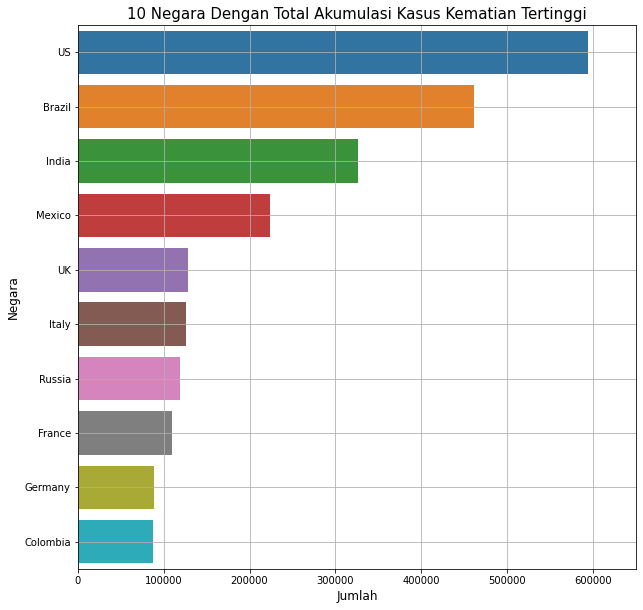

In [39]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.barplot(y = top10_country_death['Country/Region'], x = top10_country_death['Deaths'])
plt.xlim([0,650000])
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Negara', fontsize=12)
plt.title('10 Negara Dengan Total Akumulasi Kasus Kematian Tertinggi', fontsize=15)
plt.grid()
plt.show()

In [28]:
test = group_country.sort_values('Confirmed', ascending=False).reset_index()
test[test['Country/Region']=='Indonesia']

,index,Country/Region,Confirmed,Deaths,Recovered,Death Rate,Recovered Rate
17,79,Indonesia,1809926.0,50262.0,1659974.0,0.02777,0.91715


In [29]:
group_country[group_country['Country/Region']=='Indonesia']

,Country/Region,Confirmed,Deaths,Recovered,Death Rate,Recovered Rate
79,Indonesia,1809926.0,50262.0,1659974.0,0.02777,0.91715


In [30]:
group_country[group_country['Confirmed']>= 1809926].sort_values('Death Rate', ascending=False).head()

,Country/Region,Confirmed,Deaths,Recovered,Death Rate,Recovered Rate
116,Mexico,2411503.0,223455.0,1924865.0,0.092662,0.798201
138,Peru,1947555.0,68978.0,1897522.0,0.035418,0.974310
84,Italy,4213055.0,126002.0,3845087.0,0.029908,0.912660
181,UK,4496823.0,128037.0,15481.0,0.028473,0.003443
23,Brazil,16471600.0,461057.0,14496224.0,0.027991,0.880074


In [31]:
group_country[group_country['Confirmed']>= 1809926].sort_values('Recovered Rate', ascending=False).head()

,Country/Region,Confirmed,Deaths,Recovered,Death Rate,Recovered Rate
138,Peru,1947555.0,68978.0,1897522.0,0.035418,0.974310
180,Turkey,5235978.0,47271.0,5094279.0,0.009028,0.972937
64,Germany,3684672.0,88413.0,3479700.0,0.023995,0.944372
36,Colombia,3363061.0,87747.0,3141549.0,0.026091,0.934134
144,Russia,4995613.0,118781.0,4616422.0,0.023777,0.924095


In [32]:
sum_confirm = group_country['Confirmed'].sum()
sum_deaths = group_country['Deaths'].sum()
sum_recovered = group_country['Recovered'].sum()

print(sum_confirm)
print(sum_deaths)
print(sum_recovered)

169951560.0
3533619.0
107140669.0


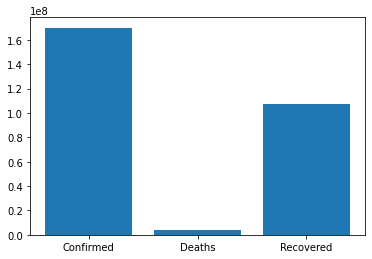

In [33]:
labels = ['Confirmed', 'Deaths', 'Recovered']
value = [sum_confirm, sum_deaths, sum_recovered]

plt.bar(labels, value)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


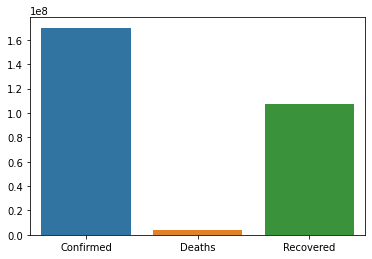

In [34]:
import seaborn as sns

sns.barplot(labels, value)

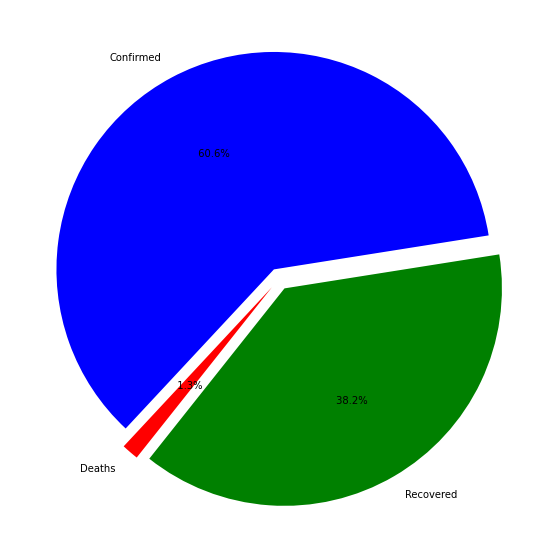

In [35]:
color= ['blue','red','green']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(value, labels=labels, autopct='%5.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

In [40]:
dff = pd.read_excel("/content/drive/MyDrive/DST/Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name="Data Indonesia dan Jakarta")
dff.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0
3,2020-03-03,2,2,0,0,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
4,2020-03-04,2,2,0,0,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0


In [41]:
dff.tail()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
514,2021-07-27,3239936,556281,2596820,86835,11606,746087,26961,13848,798502,40809,45203,-3994,47128,2069,170,14583,-11310,124,3567,-11186
515,2021-07-28,3287727,558392,2640676,88659,11688,757122,22332,12885,804027,35217,47791,2111,43856,1824,82,11035,-4629,-963,5525,-5592
516,2021-07-29,3331206,554484,2686170,90552,11844,768562,16676,10790,807872,27466,43479,-3908,45494,1893,156,11440,-5656,-2095,3845,-7751
517,2021-07-30,3372374,549343,2730720,92311,11952,779720,11264,8390,811326,19654,41168,-5141,44550,1759,108,11158,-5412,-2400,3454,-7812
518,2021-07-31,3409658,545447,2770092,94119,12135,784668,10134,7716,814653,17850,37284,-3896,39372,1808,183,4948,-1130,-674,3327,-1804


In [44]:
data_jkt_new = dff[dff['Tanggal']>'2020-01-29']
data_jkt_new.columns

Index(['Tanggal', 'Positif (Indonesia)', 'Dirawat (Indonesia)',
       'Sembuh (Indonesia)', 'Meninggal (Indonesia)', 'Meninggal (Jakarta)',
       'Sembuh (Jakarta)', 'Self-Isolation (Jakarta)', 'Dirawat (Jakarta)',
       'Positif (Jakarta)', 'Positif Aktif (Jakarta)',
       'Positif Harian (Indonesia)', 'Dirawat Harian (Indonesia)',
       'Sembuh Harian (Indonesia)', 'Meninggal Harian (Indonesia)',
       'Meninggal Harian (Jakarta)', 'Sembuh Harian (Jakarta)',
       'Self-Isolation Harian (Jakarta)', 'Dirawat Harian (Jakarta)',
       'Positif Harian (Jakarta)', 'Positif Aktif Harian (Jakarta)'],
      dtype='object')

In [45]:
data_jkt_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 1 to 518
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          518 non-null    datetime64[ns]
 1   Positif (Indonesia)              518 non-null    int64         
 2   Dirawat (Indonesia)              518 non-null    int64         
 3   Sembuh (Indonesia)               518 non-null    int64         
 4   Meninggal (Indonesia)            518 non-null    int64         
 5   Meninggal (Jakarta)              518 non-null    int64         
 6   Sembuh (Jakarta)                 518 non-null    int64         
 7   Self-Isolation (Jakarta)         518 non-null    int64         
 8   Dirawat (Jakarta)                518 non-null    int64         
 9   Positif (Jakarta)                518 non-null    int64         
 10  Positif Aktif (Jakarta)          518 non-null    int64        

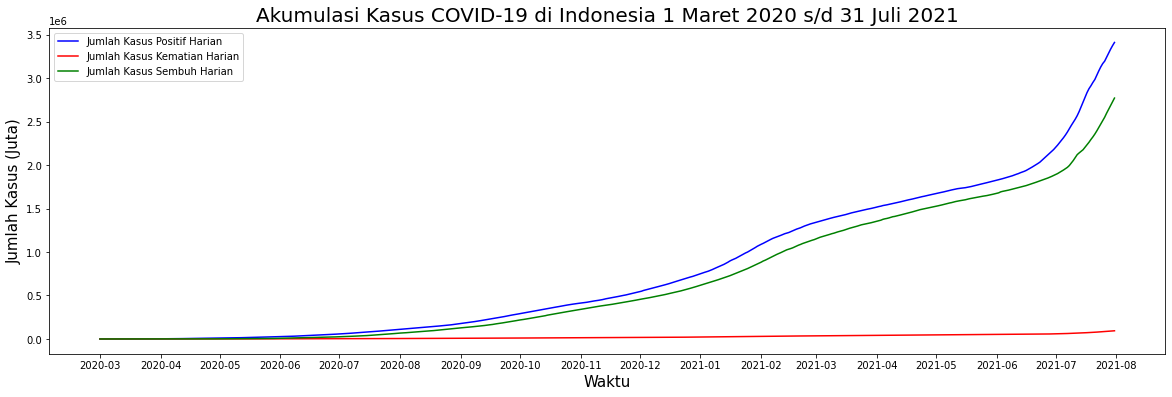

In [49]:
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)

ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Positif (Indonesia)'], color='blue', label='Jumlah Kasus Positif Harian')
ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Meninggal (Indonesia)'], color='red', label='Jumlah Kasus Kematian Harian')
ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Sembuh (Indonesia)'], color='green', label='Jumlah Kasus Sembuh Harian')
ax.set_xlabel('Waktu', fontsize=15)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.set_ylabel('Jumlah Kasus (Juta)', fontsize=15)
ax.set_title('Akumulasi Kasus COVID-19 di Indonesia 1 Maret 2020 s/d 31 Juli 2021', fontsize=20)
ax.legend()

plt.show()

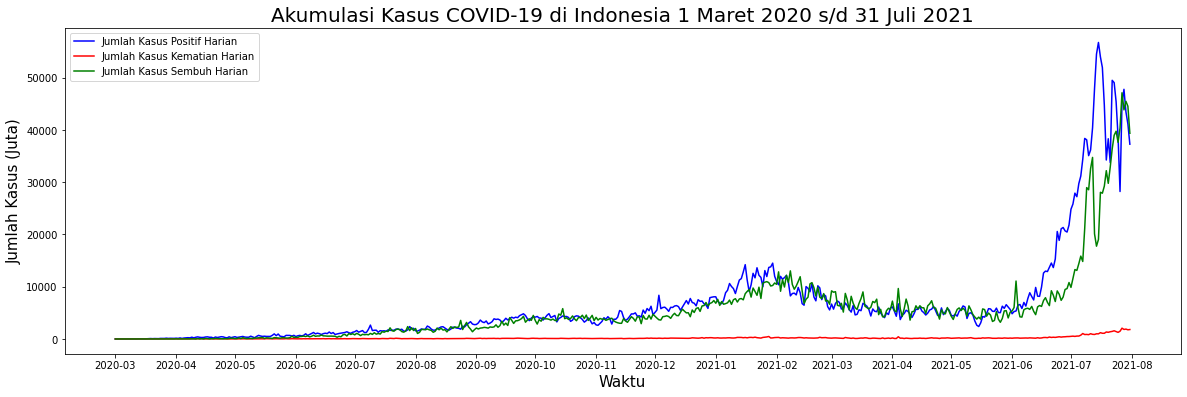

In [52]:
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)

ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Positif Harian (Indonesia)'], color='blue', label='Jumlah Kasus Positif Harian')
ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Meninggal Harian (Indonesia)'], color='red', label='Jumlah Kasus Kematian Harian')
ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Sembuh Harian (Indonesia)'], color='green', label='Jumlah Kasus Sembuh Harian')
ax.set_xlabel('Waktu', fontsize=15)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.set_ylabel('Jumlah Kasus (Juta)', fontsize=15)
ax.set_title('Akumulasi Kasus COVID-19 di Indonesia 1 Maret 2020 s/d 31 Juli 2021', fontsize=20)
ax.legend()

plt.show()

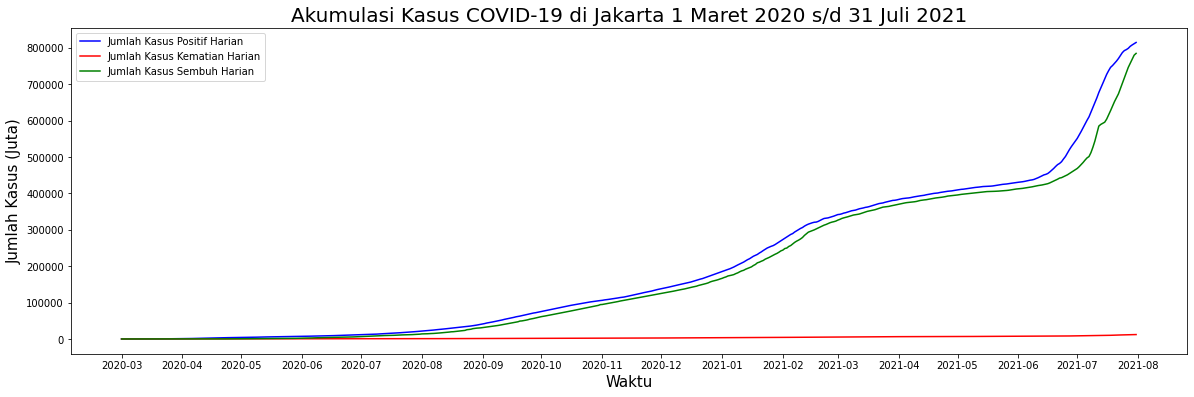

In [51]:
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)

ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Positif (Jakarta)'], color='blue', label='Jumlah Kasus Positif Harian')
ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Meninggal (Jakarta)'], color='red', label='Jumlah Kasus Kematian Harian')
ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Sembuh (Jakarta)'], color='green', label='Jumlah Kasus Sembuh Harian')
ax.set_xlabel('Waktu', fontsize=15)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.set_ylabel('Jumlah Kasus (Juta)', fontsize=15)
ax.set_title('Akumulasi Kasus COVID-19 di Jakarta 1 Maret 2020 s/d 31 Juli 2021', fontsize=20)
ax.legend()

plt.show()

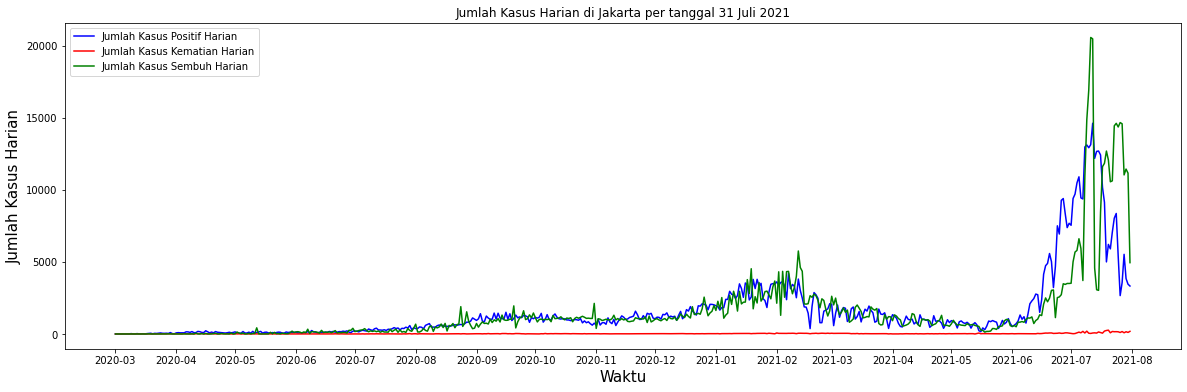

In [53]:
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)

ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Positif Harian (Jakarta)'], color='blue', label='Jumlah Kasus Positif Harian')
ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Meninggal Harian (Jakarta)'], color='red', label='Jumlah Kasus Kematian Harian')
ax.plot(data_jkt_new['Tanggal'], data_jkt_new['Sembuh Harian (Jakarta)'], color='green', label='Jumlah Kasus Sembuh Harian')
ax.set_xlabel('Waktu', fontsize=15)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.set_ylabel('Jumlah Kasus Harian', fontsize=15)
ax.set_title('Jumlah Kasus Harian di Jakarta per tanggal 31 Juli 2021')
ax.legend()

plt.show()

In [54]:
testing = data_jkt_new[['Tanggal','Positif Harian (Indonesia)']].set_index('Tanggal')
testing.head()

,Positif Harian (Indonesia)
Tanggal,
2020-03-01,0
2020-03-02,2
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [55]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(testing.values, test_size=0.2, shuffle=False)

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)

length = len(testing)

border = int((1-0.2)*length)

date_train = testing.index[:border]
date_test = testing.index[border:]

In [57]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

window = 25
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=window, batch_size=25)
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=window, batch_size=1)

In [59]:
import tensorflow as tf
reduce_LR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="mae",
    factor=0.15,
    patience=5,
    min_lr=2.e-5
)

stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [60]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True, input_shape=(window, 1)),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 60)            14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 45,781
Trainable params: 45,781
Non-trainable params: 0
_________________________________________________________________


In [62]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss='Huber',
              optimizer=optimizer,
              metrics=["mae"])

In [63]:
history = model.fit(
    train_generator,
    epochs = 20, 
    callbacks = [reduce_LR, stop_early],
    verbose = 1
)

Epoch 1/20
16/16 [==============================] - 4s 25ms/step - loss: 0.0777 - mae: 0.3056
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0736 - mae: 0.2932
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0690 - mae: 0.2805
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0653 - mae: 0.2705
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.0626 - mae: 0.2626
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.0594 - mae: 0.2554
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 0.0571 - mae: 0.2493
Epoch 8/20
16/16 [==============================] - 0s 22ms/step - loss: 0.0549 - mae: 0.2426
Epoch 9/20
16/16 [==============================] - 0s 24ms/step - loss: 0.0530 - mae: 0.2382
Epoch 10/20
16/16 [==============================] - 0s 22ms/step - loss: 0.0513 - mae: 0.2325
Epoch 11/20
16/16 [==============================] - 0s 23m

In [65]:
pred = scaler.inverse_transform(model.predict_generator(test_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


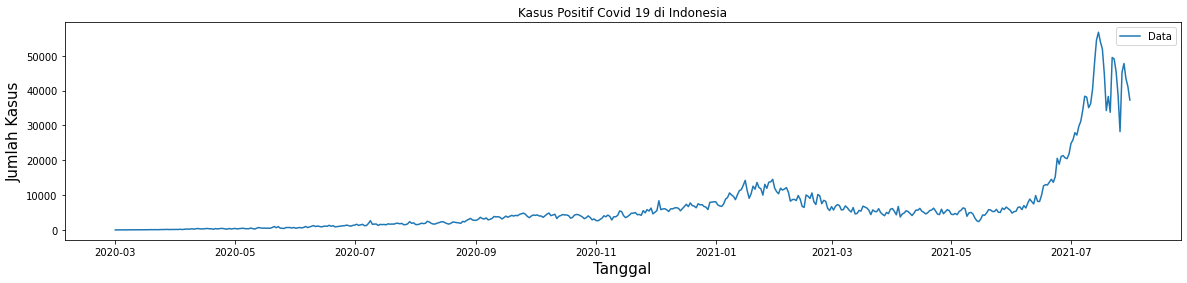

In [70]:
plt.figure(figsize=(20,4))
plt.plot(testing.index, testing.values, label = "Data")
plt.title('Kasus Positif Covid 19 di Indonesia')
plt.xlabel('{}'.format(testing.index.name),fontsize=15)
plt.ylabel('Jumlah Kasus',fontsize=15)
plt.legend()
plt.show()

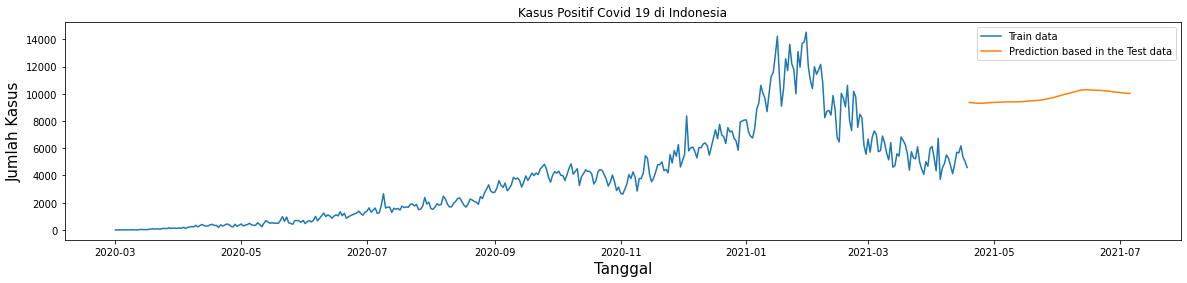

In [71]:
plt.figure(figsize=(20,4))
plt.plot(date_train, train, label = "Train data")
plt.plot(date_test[:-window], pred, label = "Prediction based in the Test data")
plt.title('Kasus Positif Covid 19 di Indonesia')
plt.xlabel('{}'.format(testing.index.name),fontsize=15)
plt.ylabel('Jumlah Kasus',fontsize=15)
plt.legend()
plt.show()

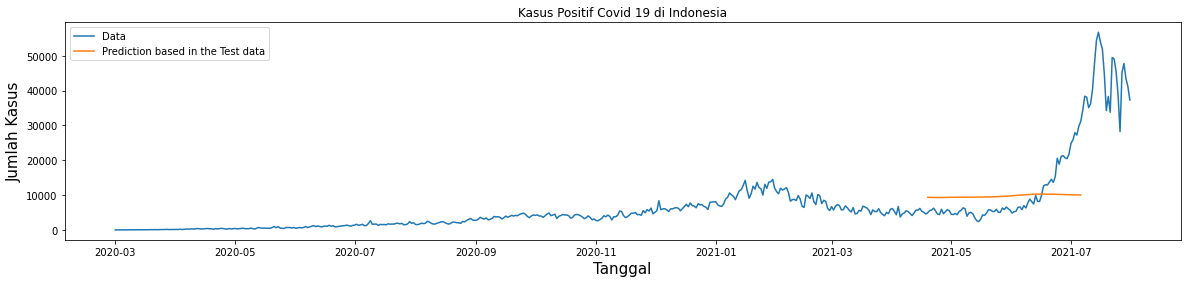

In [73]:
plt.figure(figsize=(20,4))
plt.plot(testing.index, testing.values, label = "Data")
plt.plot(date_test[:-window], pred, label = "Prediction based in the Test data")
plt.title('Kasus Positif Covid 19 di Indonesia')
plt.xlabel('{}'.format(testing.index.name),fontsize=15)
plt.ylabel('Jumlah Kasus',fontsize=15)
plt.legend()
plt.show()